# Housing Data Analysis

This notebook provides a step-by-step analysis of a housing dataset, including data understanding, manipulation, and visualization using R libraries such as `dplyr` and `ggplot2`.

## 1. Data Import

In [1]:

# Load the necessary libraries
library(dplyr)
library(ggplot2)

# Load the dataset
housing_data <- read.csv("Housing.csv")
head(housing_data)


Warning message:
"package 'dplyr' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.3.2"


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
4,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
5,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
6,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In this section, we load the housing dataset into R using the `read.csv` function.

## 2. Data Understanding and Exploration

In [2]:

# Check the structure of the dataset
str(housing_data)

# Check the number of rows and columns
dim(housing_data)


'data.frame':	545 obs. of  13 variables:
 $ price           : int  13300000 12250000 12250000 12215000 11410000 10850000 10150000 10150000 9870000 9800000 ...
 $ area            : int  7420 8960 9960 7500 7420 7500 8580 16200 8100 5750 ...
 $ bedrooms        : int  4 4 3 4 4 3 4 5 4 3 ...
 $ bathrooms       : int  2 4 2 2 1 3 3 3 1 2 ...
 $ stories         : int  3 4 2 2 2 1 4 2 2 4 ...
 $ mainroad        : chr  "yes" "yes" "yes" "yes" ...
 $ guestroom       : chr  "no" "no" "no" "no" ...
 $ basement        : chr  "no" "no" "yes" "yes" ...
 $ hotwaterheating : chr  "no" "no" "no" "no" ...
 $ airconditioning : chr  "yes" "yes" "no" "yes" ...
 $ parking         : int  2 3 2 3 2 2 2 0 2 1 ...
 $ prefarea        : chr  "yes" "no" "yes" "yes" ...
 $ furnishingstatus: chr  "furnished" "furnished" "semi-furnished" "furnished" ...


[1] 545  13

We explore the structure of the dataset using `str()` to understand the data types and check the dimensions with `dim()`.

## 3. Data Analysis: Summary Statistics

In [3]:

# Generate summary statistics for numerical variables
summary(housing_data)


     price               area          bedrooms       bathrooms    
 Min.   : 1750000   Min.   : 1650   Min.   :1.000   Min.   :1.000  
 1st Qu.: 3430000   1st Qu.: 3600   1st Qu.:2.000   1st Qu.:1.000  
 Median : 4340000   Median : 4600   Median :3.000   Median :1.000  
 Mean   : 4766729   Mean   : 5151   Mean   :2.965   Mean   :1.286  
 3rd Qu.: 5740000   3rd Qu.: 6360   3rd Qu.:3.000   3rd Qu.:2.000  
 Max.   :13300000   Max.   :16200   Max.   :6.000   Max.   :4.000  
    stories        mainroad          guestroom           basement        
 Min.   :1.000   Length:545         Length:545         Length:545        
 1st Qu.:1.000   Class :character   Class :character   Class :character  
 Median :2.000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1.806                                                           
 3rd Qu.:2.000                                                           
 Max.   :4.000                                                           
 hotwa

We generate summary statistics for the numerical variables in the dataset using the `summary()` function.

## 4. Data Visualization: Distribution of Area (Histogram)

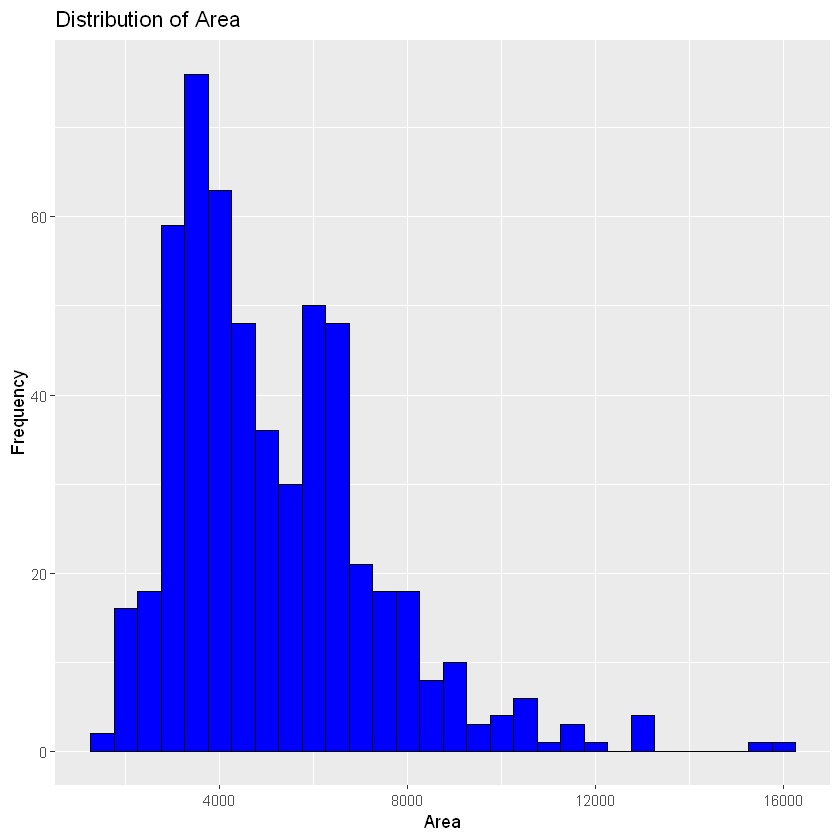

In [4]:

# Create a histogram to visualize the distribution of the 'area' variable
ggplot(housing_data, aes(x=area)) + 
  geom_histogram(binwidth=500, fill="blue", color="black") +
  labs(title="Distribution of Area", x="Area", y="Frequency")


We use `ggplot2` to create a histogram of the 'area' variable to visualize its distribution.

## 5. Data Visualization: Scatter Plot (Price vs Area)

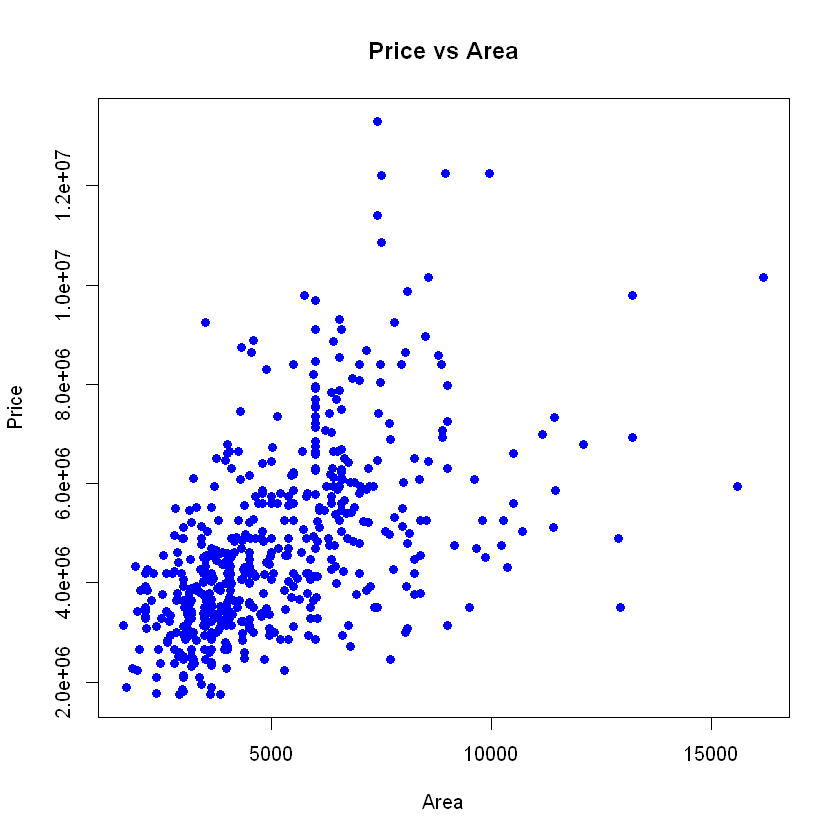

In [5]:

# Create a scatter plot to visualize the relationship between 'price' and 'area'
plot(housing_data$area, housing_data$price,
     main="Price vs Area",
     xlab="Area",
     ylab="Price",
     pch=19,
     col="blue")


We use the base R `plot()` function to create a scatter plot to explore the relationship between 'price' and 'area'.

## 6. Data Manipulation with dplyr

In [6]:

# Filter dataset to include only houses with more than 2 bathrooms
filtered_data <- filter(housing_data, bathrooms > 2)
head(filtered_data)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
3,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
4,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
5,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished
6,8190000,5960,3,3,2,yes,yes,yes,no,no,1,no,unfurnished


We use `dplyr` to filter the dataset, keeping only houses with more than 2 bathrooms.

## 7. Grouping and Summarizing Data

In [7]:

# Group by 'furnishingstatus' and calculate the mean price for each group
grouped_data <- housing_data %>%
  group_by(furnishingstatus) %>%
  summarize(mean_price = mean(price))
grouped_data


furnishingstatus,mean_price
<chr>,<dbl>
furnished,5495696
semi-furnished,4907524
unfurnished,4013831


We group the data by the 'furnishingstatus' column and calculate the mean price for each furnishing status using `dplyr`.

## 8. Data Sorting

In [8]:

# Arrange the dataset by price in descending order
sorted_data <- arrange(housing_data, desc(price))
head(sorted_data)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
4,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
5,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
6,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


We use `arrange()` to sort the dataset by the 'price' column in descending order.

## 9. Creating a New Variable

In [9]:

# Create a new variable 'price_per_sqft' as price divided by area
housing_data <- mutate(housing_data, price_per_sqft = price / area)
head(housing_data)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
1,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1792.453
2,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1367.188
3,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1229.920
4,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1628.667
5,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1537.736
6,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,1446.667


We create a new variable 'price_per_sqft' by dividing the price of the house by its area.

## 10. Combining dplyr and ggplot2

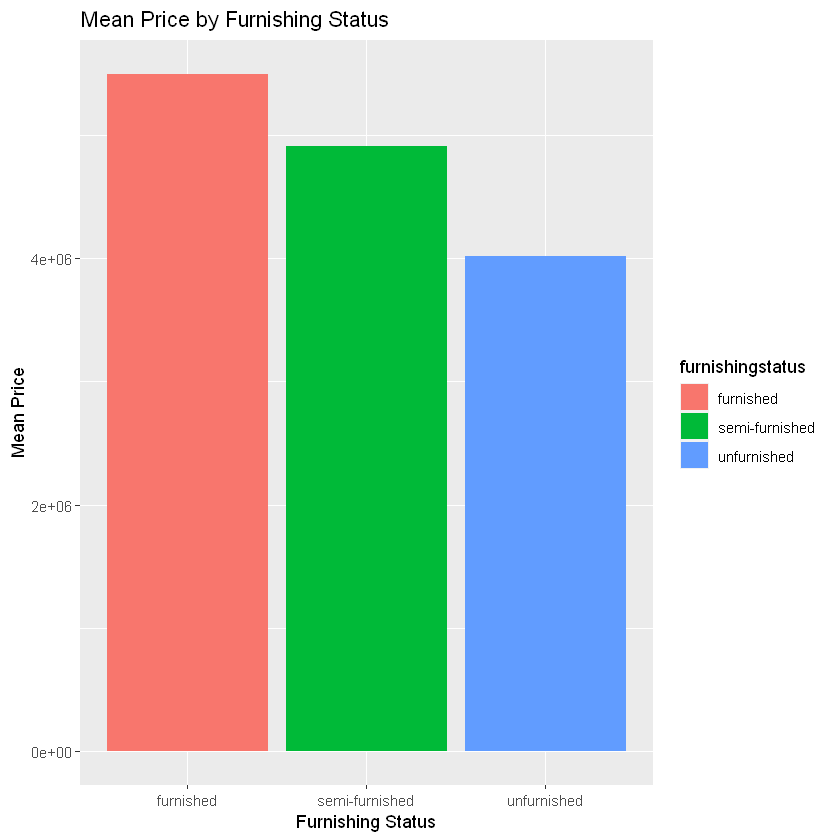

In [10]:

# Preprocess data and create a grouped bar plot
housing_data %>%
  group_by(furnishingstatus) %>%
  summarize(mean_price = mean(price)) %>%
  ggplot(aes(x=furnishingstatus, y=mean_price, fill=furnishingstatus)) +
  geom_bar(stat="identity") +
  labs(title="Mean Price by Furnishing Status", x="Furnishing Status", y="Mean Price")


We combine `dplyr` and `ggplot2` to create a grouped bar plot showing the mean price across different furnishing statuses.